In [1]:
import sys
sys.path.append('..')  # 添加项目根目录到路径

import torch
import numpy as np
import pickle
from src.models.snn import SNN, CombinedLoss
from src.data.dataset import create_dataloaders
from src.utils.training import train_model

# 设置随机种子
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

def preprocess_data(processed_data):
    """
    对数据进行预处理,包括标准化、归一化等
    """
    # 获取训练集数据
    X_train = processed_data['X_train'].numpy()
    X_val = processed_data['X_val'].numpy() 
    X_test = processed_data['X_test'].numpy()
    
    # 1. 标准化 - 使用训练集的均值和标准差
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / (std + 1e-8)
    X_val = (X_val - mean) / (std + 1e-8)
    X_test = (X_test - mean) / (std + 1e-8)
    
    # 2. 处理异常值
    clip_value = 5.0  # 设置截断阈值
    X_train = np.clip(X_train, -clip_value, clip_value)
    X_val = np.clip(X_val, -clip_value, clip_value)
    X_test = np.clip(X_test, -clip_value, clip_value)
    
    # 3. 转回PyTorch张量
    processed_data['X_train'] = torch.FloatTensor(X_train)
    processed_data['X_val'] = torch.FloatTensor(X_val)
    processed_data['X_test'] = torch.FloatTensor(X_test)
    
    return processed_data

def analyze_data(processed_data):
    """
    分析数据分布和特征
    """
    print("\n数据分析:")
    print(f"训练集形状: {processed_data['X_train'].shape}")
    print(f"验证集形状: {processed_data['X_val'].shape}")
    print(f"测试集形状: {processed_data['X_test'].shape}")
    
    # 分析类别分布
    print("\n类别分布:")
    for split in ['train', 'val', 'test']:
        labels = processed_data[f'y_{split}'].numpy()
        unique, counts = np.unique(labels, return_counts=True)
        print(f"\n{split.capitalize()}集:")
        for label, count in zip(unique, counts):
            print(f"类别 {processed_data['classes'][label]}: {count} "
                  f"({count/len(labels)*100:.1f}%)")
    
    # 绘制特征分布图
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    plt.hist(processed_data['X_train'].numpy().ravel(), bins=50, alpha=0.5)
    plt.title('特征分布(标准化前)')
    plt.xlabel('特征值')
    plt.ylabel('频次')
    
    # 标准化后的分布
    X_norm = (processed_data['X_train'].numpy() - 
              np.mean(processed_data['X_train'].numpy(), axis=0)) / \
             (np.std(processed_data['X_train'].numpy(), axis=0) + 1e-8)
    
    plt.subplot(122)
    plt.hist(X_norm.ravel(), bins=50, alpha=0.5)
    plt.title('特征分布(标准化后)')
    plt.xlabel('特征值')
    plt.ylabel('频次')
    
    plt.tight_layout()
    plt.show()

def check_data_quality(processed_data):
    """
    检查数据质量
    """
    print("\n数据质量检查:")
    
    # 检查缺失值
    for split in ['train', 'val', 'test']:
        X = processed_data[f'X_{split}'].numpy()
        print(f"\n{split.capitalize()}集:")
        print(f"缺失值数量: {np.isnan(X).sum()}")
        print(f"无穷值数量: {np.isinf(X).sum()}")
        
        # 检查异常值(超过3个标准差)
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        outliers = np.abs(X - mean) > 3 * std
        print(f"异常值比例: {outliers.sum() / X.size * 100:.2f}%")
        
        # 检查零值比例
        zero_ratio = (X == 0).sum() / X.size
        print(f"零值比例: {zero_ratio * 100:.2f}%")

# 在训练前使用这些函数
print("开始数据预处理...")
with open('../data/processed/processed_data.pkl', 'rb') as f:
    processed_data = pickle.load(f)

# 分析原始数据
print("\n分析原始数据:")
# analyze_data(processed_data)

# 检查数据质量
# check_data_quality(processed_data)

# 预处理数据
# processed_data = preprocess_data(processed_data)

# 分析预处理后的数据
print("\n分析预处理后的数据:")
# analyze_data(processed_data)
# check_data_quality(processed_data)

# 现在开始训练
print("\n开始训练模型...")

开始数据预处理...

分析原始数据:

分析预处理后的数据:

开始训练模型...


Using device: cpu

Data dimension check:
Feature shape: torch.Size([14175, 222])
Label shape: torch.Size([14175])
Number of classes: 5

First batch dimensions:
x1 shape: torch.Size([128, 222])
x2 shape: torch.Size([128, 1, 222])
y1 shape: torch.Size([128])
y2 shape: torch.Size([128, 1])

Model configuration:
Input dimension: 222
Number of classes: 5

Epoch 1/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 65.61it/s]


Saved new best model with val_acc: 0.3422, val_loss: 2.1770
Current LR: 0.000054
Train Loss: 5.5373, Train Acc: 0.2154
Val Loss: 2.1770, Val Acc: 0.3422

Epoch 2/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.45it/s]


Saved new best model with val_acc: 0.4558, val_loss: 2.0447
Current LR: 0.000065
Train Loss: 2.1853, Train Acc: 0.2875
Val Loss: 2.0447, Val Acc: 0.4558

Epoch 3/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 67.15it/s]


Saved new best model with val_acc: 0.5284, val_loss: 1.8460
Current LR: 0.000083
Train Loss: 1.9968, Train Acc: 0.4014
Val Loss: 1.8460, Val Acc: 0.5284

Epoch 4/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 67.21it/s]


Saved new best model with val_acc: 0.5738, val_loss: 1.6099
Current LR: 0.000109
Train Loss: 1.8446, Train Acc: 0.4899
Val Loss: 1.6099, Val Acc: 0.5738

Epoch 5/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 62.58it/s]


Saved new best model with val_acc: 0.6385, val_loss: 1.4370
Current LR: 0.000141
Train Loss: 1.6575, Train Acc: 0.5696
Val Loss: 1.4370, Val Acc: 0.6385

Epoch 6/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 68.53it/s]


Saved new best model with val_acc: 0.6657, val_loss: 1.3316
Current LR: 0.000179
Train Loss: 1.5140, Train Acc: 0.6201
Val Loss: 1.3316, Val Acc: 0.6657

Epoch 7/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.35it/s]


Saved new best model with val_acc: 0.6919, val_loss: 1.2928
Current LR: 0.000222
Train Loss: 1.4247, Train Acc: 0.6560
Val Loss: 1.2928, Val Acc: 0.6919

Epoch 8/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.16it/s]


Saved new best model with val_acc: 0.7427, val_loss: 1.2147
Current LR: 0.000271
Train Loss: 1.3576, Train Acc: 0.6863
Val Loss: 1.2147, Val Acc: 0.7427

Epoch 9/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.54it/s]


Current LR: 0.000323
Train Loss: 1.2898, Train Acc: 0.7144
Val Loss: 1.1654, Val Acc: 0.7412

Epoch 10/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.41it/s]


Saved new best model with val_acc: 0.7684, val_loss: 1.1076
Current LR: 0.000378
Train Loss: 1.2393, Train Acc: 0.7366
Val Loss: 1.1076, Val Acc: 0.7684

Epoch 11/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.41it/s]


Saved new best model with val_acc: 0.7951, val_loss: 1.0671
Current LR: 0.000436
Train Loss: 1.1916, Train Acc: 0.7562
Val Loss: 1.0671, Val Acc: 0.7951

Epoch 12/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.40it/s]


Saved new best model with val_acc: 0.8173, val_loss: 1.0096
Current LR: 0.000495
Train Loss: 1.1336, Train Acc: 0.7769
Val Loss: 1.0096, Val Acc: 0.8173

Epoch 13/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.35it/s]


Saved new best model with val_acc: 0.8306, val_loss: 0.9707
Current LR: 0.000555
Train Loss: 1.1017, Train Acc: 0.7909
Val Loss: 0.9707, Val Acc: 0.8306

Epoch 14/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.62it/s]


Saved new best model with val_acc: 0.8519, val_loss: 0.9558
Current LR: 0.000614
Train Loss: 1.0587, Train Acc: 0.8084
Val Loss: 0.9558, Val Acc: 0.8519

Epoch 15/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 62.71it/s]


Saved new best model with val_acc: 0.8583, val_loss: 0.9255
Current LR: 0.000672
Train Loss: 1.0279, Train Acc: 0.8222
Val Loss: 0.9255, Val Acc: 0.8583

Epoch 16/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.59it/s]


Saved new best model with val_acc: 0.8716, val_loss: 0.8862
Current LR: 0.000728
Train Loss: 0.9895, Train Acc: 0.8346
Val Loss: 0.8862, Val Acc: 0.8716

Epoch 17/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 64.58it/s]


Saved new best model with val_acc: 0.8879, val_loss: 0.8566
Current LR: 0.000780
Train Loss: 0.9734, Train Acc: 0.8408
Val Loss: 0.8566, Val Acc: 0.8879

Epoch 18/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 63.82it/s]


Current LR: 0.000828
Train Loss: 0.9403, Train Acc: 0.8539
Val Loss: 0.8691, Val Acc: 0.8835

Epoch 19/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 64.99it/s]


Saved new best model with val_acc: 0.8884, val_loss: 0.8360
Current LR: 0.000872
Train Loss: 0.9198, Train Acc: 0.8612
Val Loss: 0.8360, Val Acc: 0.8884

Epoch 20/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 68.17it/s]


Saved new best model with val_acc: 0.8933, val_loss: 0.8382
Current LR: 0.000910
Train Loss: 0.8935, Train Acc: 0.8677
Val Loss: 0.8382, Val Acc: 0.8933

Epoch 21/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.80it/s]


Saved new best model with val_acc: 0.8978, val_loss: 0.8048
Current LR: 0.000941
Train Loss: 0.8784, Train Acc: 0.8739
Val Loss: 0.8048, Val Acc: 0.8978

Epoch 22/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.39it/s]


Saved new best model with val_acc: 0.9052, val_loss: 0.8052
Current LR: 0.000967
Train Loss: 0.8574, Train Acc: 0.8853
Val Loss: 0.8052, Val Acc: 0.9052

Epoch 23/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.66it/s]


Current LR: 0.000985
Train Loss: 0.8512, Train Acc: 0.8874
Val Loss: 0.7844, Val Acc: 0.8968

Epoch 24/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.04it/s]


Saved new best model with val_acc: 0.9200, val_loss: 0.7699
Current LR: 0.000996
Train Loss: 0.8313, Train Acc: 0.8876
Val Loss: 0.7699, Val Acc: 0.9200

Epoch 25/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 68.16it/s]


Current LR: 0.001000
Train Loss: 0.8219, Train Acc: 0.8912
Val Loss: 0.8200, Val Acc: 0.8889

Epoch 26/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 65.29it/s]


Saved new best model with val_acc: 0.9205, val_loss: 0.7521
Current LR: 0.001000
Train Loss: 0.8013, Train Acc: 0.9002
Val Loss: 0.7521, Val Acc: 0.9205

Epoch 27/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 65.59it/s]


Saved new best model with val_acc: 0.9230, val_loss: 0.7572
Current LR: 0.000998
Train Loss: 0.7946, Train Acc: 0.9026
Val Loss: 0.7572, Val Acc: 0.9230

Epoch 28/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 67.27it/s]


Saved new best model with val_acc: 0.9363, val_loss: 0.7250
Current LR: 0.000996
Train Loss: 0.7851, Train Acc: 0.9077
Val Loss: 0.7250, Val Acc: 0.9363

Epoch 29/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.42it/s]


Current LR: 0.000993
Train Loss: 0.7780, Train Acc: 0.9110
Val Loss: 0.7301, Val Acc: 0.9240

Epoch 30/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.46it/s]


Saved new best model with val_acc: 0.9378, val_loss: 0.7128
Current LR: 0.000989
Train Loss: 0.7651, Train Acc: 0.9134
Val Loss: 0.7128, Val Acc: 0.9378

Epoch 31/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 65.16it/s]


Saved new best model with val_acc: 0.9412, val_loss: 0.7067
Current LR: 0.000984
Train Loss: 0.7617, Train Acc: 0.9190
Val Loss: 0.7067, Val Acc: 0.9412

Epoch 32/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 68.61it/s]


Current LR: 0.000979
Train Loss: 0.7562, Train Acc: 0.9177
Val Loss: 0.7014, Val Acc: 0.9393

Epoch 33/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 69.78it/s]


Saved new best model with val_acc: 0.9437, val_loss: 0.6911
Current LR: 0.000972
Train Loss: 0.7391, Train Acc: 0.9242
Val Loss: 0.6911, Val Acc: 0.9437

Epoch 34/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 63.99it/s]


Current LR: 0.000965
Train Loss: 0.7369, Train Acc: 0.9254
Val Loss: 0.7365, Val Acc: 0.9205

Epoch 35/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 64.20it/s]


Current LR: 0.000957
Train Loss: 0.7324, Train Acc: 0.9263
Val Loss: 0.7011, Val Acc: 0.9407

Epoch 36/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 69.84it/s]


Current LR: 0.000948
Train Loss: 0.7209, Train Acc: 0.9277
Val Loss: 0.6941, Val Acc: 0.9388

Epoch 37/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.51it/s]


Current LR: 0.000938
Train Loss: 0.7173, Train Acc: 0.9309
Val Loss: 0.6978, Val Acc: 0.9393

Epoch 38/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 69.98it/s]


Saved new best model with val_acc: 0.9467, val_loss: 0.6801
Current LR: 0.000928
Train Loss: 0.7086, Train Acc: 0.9314
Val Loss: 0.6801, Val Acc: 0.9467

Epoch 39/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.30it/s]


Saved new best model with val_acc: 0.9491, val_loss: 0.6800
Current LR: 0.000916
Train Loss: 0.7052, Train Acc: 0.9359
Val Loss: 0.6800, Val Acc: 0.9491

Epoch 40/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.16it/s]


Current LR: 0.000904
Train Loss: 0.7074, Train Acc: 0.9345
Val Loss: 0.6618, Val Acc: 0.9462

Epoch 41/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 66.59it/s]


Current LR: 0.000892
Train Loss: 0.7031, Train Acc: 0.9390
Val Loss: 0.6789, Val Acc: 0.9486

Epoch 42/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 68.50it/s]


Saved new best model with val_acc: 0.9536, val_loss: 0.6561
Current LR: 0.000878
Train Loss: 0.6962, Train Acc: 0.9370
Val Loss: 0.6561, Val Acc: 0.9536

Epoch 43/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.30it/s]


Current LR: 0.000864
Train Loss: 0.6872, Train Acc: 0.9417
Val Loss: 0.6709, Val Acc: 0.9521

Epoch 44/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.67it/s]


Saved new best model with val_acc: 0.9546, val_loss: 0.6775
Current LR: 0.000850
Train Loss: 0.6842, Train Acc: 0.9433
Val Loss: 0.6775, Val Acc: 0.9546

Epoch 45/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 69.66it/s]


Current LR: 0.000834
Train Loss: 0.6822, Train Acc: 0.9443
Val Loss: 0.6487, Val Acc: 0.9521

Epoch 46/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 70.56it/s]


Current LR: 0.000819
Train Loss: 0.6822, Train Acc: 0.9431
Val Loss: 0.6644, Val Acc: 0.9501

Epoch 47/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.61it/s]


Current LR: 0.000802
Train Loss: 0.6819, Train Acc: 0.9441
Val Loss: 0.6691, Val Acc: 0.9496

Epoch 48/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.80it/s]


Saved new best model with val_acc: 0.9556, val_loss: 0.6484
Current LR: 0.000785
Train Loss: 0.6659, Train Acc: 0.9484
Val Loss: 0.6484, Val Acc: 0.9556

Epoch 49/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.40it/s]


Current LR: 0.000768
Train Loss: 0.6654, Train Acc: 0.9469
Val Loss: 0.6398, Val Acc: 0.9521

Epoch 50/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.98it/s]


Current LR: 0.000750
Train Loss: 0.6708, Train Acc: 0.9483
Val Loss: 0.6635, Val Acc: 0.9556

Epoch 51/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.70it/s]


Saved new best model with val_acc: 0.9615, val_loss: 0.6515
Current LR: 0.000731
Train Loss: 0.6602, Train Acc: 0.9505
Val Loss: 0.6515, Val Acc: 0.9615

Epoch 52/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.10it/s]


Current LR: 0.000713
Train Loss: 0.6550, Train Acc: 0.9521
Val Loss: 0.6336, Val Acc: 0.9580

Epoch 53/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.11it/s]


Current LR: 0.000694
Train Loss: 0.6583, Train Acc: 0.9515
Val Loss: 0.6397, Val Acc: 0.9570

Epoch 54/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.24it/s]


Saved new best model with val_acc: 0.9620, val_loss: 0.6327
Current LR: 0.000674
Train Loss: 0.6497, Train Acc: 0.9539
Val Loss: 0.6327, Val Acc: 0.9620

Epoch 55/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.04it/s]


Current LR: 0.000654
Train Loss: 0.6481, Train Acc: 0.9557
Val Loss: 0.6434, Val Acc: 0.9575

Epoch 56/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.15it/s]


Current LR: 0.000634
Train Loss: 0.6466, Train Acc: 0.9546
Val Loss: 0.6486, Val Acc: 0.9570

Epoch 57/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.94it/s]


Current LR: 0.000614
Train Loss: 0.6434, Train Acc: 0.9553
Val Loss: 0.6543, Val Acc: 0.9541

Epoch 58/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.73it/s]


Current LR: 0.000594
Train Loss: 0.6439, Train Acc: 0.9557
Val Loss: 0.6351, Val Acc: 0.9590

Epoch 59/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.64it/s]


Saved new best model with val_acc: 0.9635, val_loss: 0.6607
Current LR: 0.000573
Train Loss: 0.6394, Train Acc: 0.9572
Val Loss: 0.6607, Val Acc: 0.9635

Epoch 60/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.82it/s]


Current LR: 0.000552
Train Loss: 0.6403, Train Acc: 0.9570
Val Loss: 0.6336, Val Acc: 0.9620

Epoch 61/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.29it/s]


Current LR: 0.000531
Train Loss: 0.6361, Train Acc: 0.9579
Val Loss: 0.6292, Val Acc: 0.9625

Epoch 62/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.20it/s]


Current LR: 0.000510
Train Loss: 0.6331, Train Acc: 0.9599
Val Loss: 0.6513, Val Acc: 0.9580

Epoch 63/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.18it/s]


Current LR: 0.000489
Train Loss: 0.6295, Train Acc: 0.9612
Val Loss: 0.6326, Val Acc: 0.9625

Epoch 64/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.20it/s]


Saved new best model with val_acc: 0.9694, val_loss: 0.6258
Current LR: 0.000468
Train Loss: 0.6224, Train Acc: 0.9643
Val Loss: 0.6258, Val Acc: 0.9694

Epoch 65/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 66.59it/s]


Current LR: 0.000448
Train Loss: 0.6206, Train Acc: 0.9644
Val Loss: 0.6483, Val Acc: 0.9630

Epoch 66/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 67.80it/s]


Current LR: 0.000427
Train Loss: 0.6196, Train Acc: 0.9642
Val Loss: 0.6221, Val Acc: 0.9659

Epoch 67/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 63.42it/s]


Current LR: 0.000406
Train Loss: 0.6198, Train Acc: 0.9652
Val Loss: 0.6261, Val Acc: 0.9664

Epoch 68/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 69.22it/s]


Current LR: 0.000386
Train Loss: 0.6132, Train Acc: 0.9647
Val Loss: 0.6200, Val Acc: 0.9654

Epoch 69/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.34it/s]


Current LR: 0.000365
Train Loss: 0.6174, Train Acc: 0.9666
Val Loss: 0.6236, Val Acc: 0.9659

Epoch 70/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.48it/s]


Current LR: 0.000345
Train Loss: 0.6128, Train Acc: 0.9666
Val Loss: 0.6286, Val Acc: 0.9674

Epoch 71/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.02it/s]


Current LR: 0.000326
Train Loss: 0.6091, Train Acc: 0.9671
Val Loss: 0.6293, Val Acc: 0.9659

Epoch 72/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.42it/s]


Current LR: 0.000306
Train Loss: 0.6109, Train Acc: 0.9679
Val Loss: 0.6368, Val Acc: 0.9630

Epoch 73/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.03it/s]


Current LR: 0.000287
Train Loss: 0.6074, Train Acc: 0.9670
Val Loss: 0.6203, Val Acc: 0.9679

Epoch 74/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 63.31it/s]


Current LR: 0.000268
Train Loss: 0.6040, Train Acc: 0.9707
Val Loss: 0.6301, Val Acc: 0.9640

Epoch 75/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.29it/s]


Current LR: 0.000250
Train Loss: 0.6051, Train Acc: 0.9699
Val Loss: 0.6345, Val Acc: 0.9635

Epoch 76/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.55it/s]


Current LR: 0.000232
Train Loss: 0.6025, Train Acc: 0.9715
Val Loss: 0.6150, Val Acc: 0.9659

Epoch 77/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.44it/s]


Current LR: 0.000215
Train Loss: 0.6015, Train Acc: 0.9710
Val Loss: 0.6246, Val Acc: 0.9669

Epoch 78/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.58it/s]


Current LR: 0.000198
Train Loss: 0.5958, Train Acc: 0.9725
Val Loss: 0.6237, Val Acc: 0.9694

Epoch 79/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.31it/s]


Current LR: 0.000181
Train Loss: 0.5980, Train Acc: 0.9707
Val Loss: 0.6354, Val Acc: 0.9684

Epoch 80/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.91it/s]


Saved new best model with val_acc: 0.9704, val_loss: 0.6234
Current LR: 0.000165
Train Loss: 0.5969, Train Acc: 0.9733
Val Loss: 0.6234, Val Acc: 0.9704

Epoch 81/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.79it/s]


Current LR: 0.000150
Train Loss: 0.5967, Train Acc: 0.9731
Val Loss: 0.6249, Val Acc: 0.9694

Epoch 82/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.48it/s]


Current LR: 0.000135
Train Loss: 0.5918, Train Acc: 0.9746
Val Loss: 0.6192, Val Acc: 0.9689

Epoch 83/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.68it/s]


Current LR: 0.000121
Train Loss: 0.5891, Train Acc: 0.9748
Val Loss: 0.6250, Val Acc: 0.9684

Epoch 84/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.37it/s]


Current LR: 0.000108
Train Loss: 0.5868, Train Acc: 0.9750
Val Loss: 0.6178, Val Acc: 0.9689

Epoch 85/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.33it/s]


Current LR: 0.000095
Train Loss: 0.5889, Train Acc: 0.9759
Val Loss: 0.6225, Val Acc: 0.9689

Epoch 86/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.36it/s]


Current LR: 0.000083
Train Loss: 0.5841, Train Acc: 0.9779
Val Loss: 0.6197, Val Acc: 0.9674

Epoch 87/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.65it/s]


Current LR: 0.000072
Train Loss: 0.5896, Train Acc: 0.9743
Val Loss: 0.6159, Val Acc: 0.9694

Epoch 88/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.72it/s]


Current LR: 0.000062
Train Loss: 0.5851, Train Acc: 0.9766
Val Loss: 0.6147, Val Acc: 0.9694

Epoch 89/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.79it/s]


Current LR: 0.000052
Train Loss: 0.5865, Train Acc: 0.9754
Val Loss: 0.6241, Val Acc: 0.9684

Epoch 90/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.76it/s]


Current LR: 0.000043
Train Loss: 0.5860, Train Acc: 0.9769
Val Loss: 0.6204, Val Acc: 0.9694

Epoch 91/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.68it/s]


Saved new best model with val_acc: 0.9719, val_loss: 0.6367
Current LR: 0.000035
Train Loss: 0.5808, Train Acc: 0.9769
Val Loss: 0.6367, Val Acc: 0.9719

Epoch 92/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.01it/s]


Current LR: 0.000028
Train Loss: 0.5836, Train Acc: 0.9760
Val Loss: 0.6178, Val Acc: 0.9699

Epoch 93/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 71.12it/s]


Current LR: 0.000021
Train Loss: 0.5790, Train Acc: 0.9783
Val Loss: 0.6133, Val Acc: 0.9684

Epoch 94/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.40it/s]


Current LR: 0.000016
Train Loss: 0.5827, Train Acc: 0.9757
Val Loss: 0.6128, Val Acc: 0.9684

Epoch 95/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.37it/s]


Current LR: 0.000011
Train Loss: 0.5840, Train Acc: 0.9777
Val Loss: 0.6159, Val Acc: 0.9694

Epoch 96/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.16it/s]


Current LR: 0.000007
Train Loss: 0.5812, Train Acc: 0.9782
Val Loss: 0.6160, Val Acc: 0.9689

Epoch 97/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.35it/s]


Current LR: 0.000004
Train Loss: 0.5829, Train Acc: 0.9764
Val Loss: 0.6158, Val Acc: 0.9684

Epoch 98/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.75it/s]


Current LR: 0.000002
Train Loss: 0.5851, Train Acc: 0.9762
Val Loss: 0.6217, Val Acc: 0.9684

Epoch 99/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.01it/s]


Current LR: 0.000000
Train Loss: 0.5846, Train Acc: 0.9777
Val Loss: 0.6244, Val Acc: 0.9684

Epoch 100/100


Training: 100%|███████████████████████████████████████| 111/111 [00:01<00:00, 72.59it/s]


Current LR: 0.000000
Train Loss: 0.5813, Train Acc: 0.9774
Val Loss: 0.6138, Val Acc: 0.9684


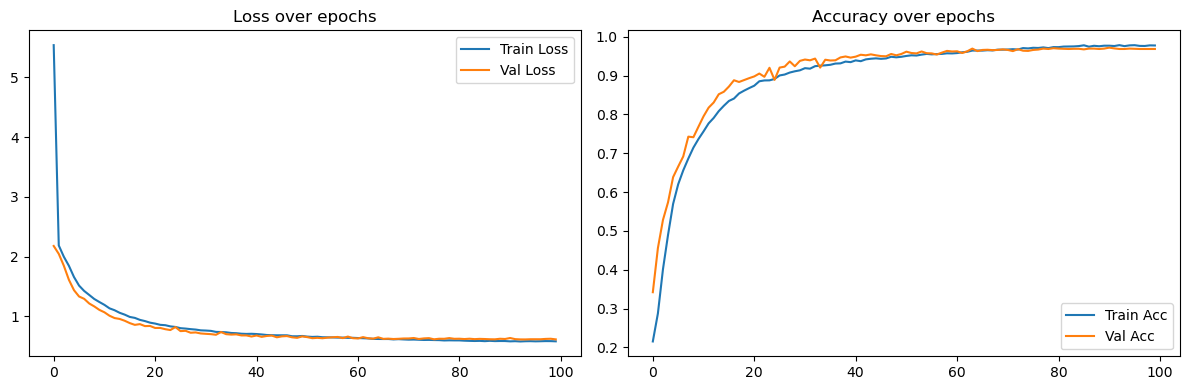

/Users/ww/Desktop/ecg_snn_project/notebooks/../src/utils/training.py:270: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('best_model.pth')



Loaded best model from epoch 91

Test Results:
Test Loss: 0.6193
Test Accuracy: 0.9694

Classification Report:
              precision    recall  f1-score   support

           A       0.96      0.99      0.97       810
           L       0.99      0.99      0.99       810
           N       0.97      0.94      0.95       810
           R       0.98      0.99      0.98       810
           V       0.95      0.94      0.95       810

    accuracy                           0.97      4050
   macro avg       0.97      0.97      0.97      4050
weighted avg       0.97      0.97      0.97      4050



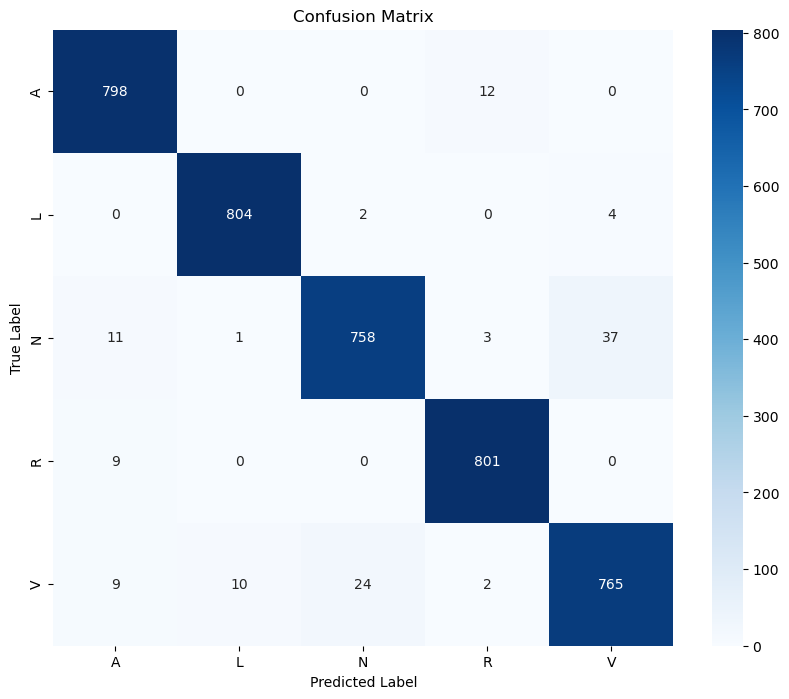

In [2]:

model, history = train_model(processed_data, num_epochs=100, batch_size=128, lr=0.001)

In [3]:
# 继续在您的代码后添加实验部分

import torch.nn as nn
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import psutil
import GPUtil
from datetime import datetime

class ExperimentAnalysis:
    def __init__(self, model, processed_data, device):
        self.model = model
        self.processed_data = processed_data
        self.device = device
        self.results = {}
        
    def performance_analysis(self):
        """模型性能分析"""
        print("\n开始性能分析...")
        
        # 创建数据加载器
        _, _, test_loader = create_dataloaders(
            self.processed_data['X_train'], self.processed_data['y_train'],
            self.processed_data['X_val'], self.processed_data['y_val'],
            self.processed_data['X_test'], self.processed_data['y_test']
        )
        
        # 模型评估
        self.model.eval()
        all_preds = []
        all_labels = []
        inference_times = []
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs = inputs.to(self.device)
                start_time = time.time()
                outputs = self.model(inputs)
                inference_times.append(time.time() - start_time)
                
                preds = outputs.argmax(dim=1).cpu()
                all_preds.extend(preds.numpy())
                all_labels.extend(labels.numpy())
        
        # 计算混淆矩阵
        cm = confusion_matrix(all_labels, all_preds)
        
        # 绘制混淆矩阵
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.processed_data['classes'],
                    yticklabels=self.processed_data['classes'])
        plt.title('混淆矩阵')
        plt.xlabel('预测类别')
        plt.ylabel('真实类别')
        plt.tight_layout()
        plt.savefig('confusion_matrix.png')
        plt.close()
        
        # 保存性能指标
        self.results['performance'] = {
            'classification_report': classification_report(
                all_labels, all_preds, 
                target_names=self.processed_data['classes']
            ),
            'avg_inference_time': np.mean(inference_times)
        }
        
        print("\n分类报告:")
        print(self.results['performance']['classification_report'])
        print(f"\n平均推理时间: {self.results['performance']['avg_inference_time']*1000:.2f} ms")
        
    def energy_consumption_analysis(self, duration=60):
        """能耗分析"""
        print("\n开始能耗分析...")
        
        metrics = {
            'timestamp': [],
            'cpu_usage': [],
            'memory_usage': [],
            'gpu_usage': [] if torch.cuda.is_available() else None
        }
        
        start_time = time.time()
        while (time.time() - start_time) < duration:
            # CPU使用率
            metrics['cpu_usage'].append(psutil.cpu_percent())
            
            # 内存使用
            memory = psutil.Process().memory_info()
            metrics['memory_usage'].append(memory.rss / 1024 / 1024)  # MB
            
            # GPU使用率
            if torch.cuda.is_available():
                metrics['gpu_usage'].append(GPUtil.getGPUs()[0].load * 100)
                
            metrics['timestamp'].append(time.time() - start_time)
            time.sleep(0.1)
        
        # 绘制资源使用图
        plt.figure(figsize=(12, 8))
        
        plt.subplot(211)
        plt.plot(metrics['timestamp'], metrics['cpu_usage'])
        plt.title('CPU使用率')
        plt.xlabel('时间 (秒)')
        plt.ylabel('使用率 (%)')
        
        plt.subplot(212)
        plt.plot(metrics['timestamp'], metrics['memory_usage'])
        plt.title('内存使用')
        plt.xlabel('时间 (秒)')
        plt.ylabel('使用量 (MB)')
        
        plt.tight_layout()
        plt.savefig('resource_usage.png')
        plt.close()
        
        self.results['energy'] = {
            'avg_cpu_usage': np.mean(metrics['cpu_usage']),
            'avg_memory_usage': np.mean(metrics['memory_usage']),
            'avg_gpu_usage': np.mean(metrics['gpu_usage']) if torch.cuda.is_available() else None
        }
        
        print("\n资源使用情况:")
        print(f"平均CPU使用率: {self.results['energy']['avg_cpu_usage']:.1f}%")
        print(f"平均内存使用: {self.results['energy']['avg_memory_usage']:.1f} MB")
        if torch.cuda.is_available():
            print(f"平均GPU使用率: {self.results['energy']['avg_gpu_usage']:.1f}%")
            
    def ablation_study(self):
        """消融实验"""
        print("\n开始消融实验...")
        
        # 这里需要根据您的模型结构定义不同的变体
        variants = {
            'full_model': self.model,
            'no_temporal': self.model_without_temporal(),
            'reduced_neurons': self.model_with_reduced_neurons()
        }
        
        results = {}
        for name, model_variant in variants.items():
            # 训练和评估每个变体
            accuracy = self.evaluate_variant(model_variant)
            results[name] = accuracy
            
        # 绘制结果对比
        plt.figure(figsize=(10, 6))
        plt.bar(results.keys(), results.values())
        plt.title('消融实验结果')
        plt.xlabel('模型变体')
        plt.ylabel('准确率')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('ablation_study.png')
        plt.close()
        
        self.results['ablation'] = results
        
    def parameter_sensitivity(self):
        """参数敏感性分析"""
        print("\n开始参数敏感性分析...")
        
        # 定义要测试的参数范围
        parameters = {
            'threshold': [0.1, 0.3, 0.5, 0.7, 0.9],
            'tau': [1.0, 2.0, 5.0, 10.0],
            'learning_rate': [0.001, 0.01, 0.1]
        }
        
        sensitivity_results = {}
        for param_name, param_values in parameters.items():
            accuracies = []
            for value in param_values:
                # 使用不同参数值训练模型
                accuracy = self.train_with_parameter(param_name, value)
                accuracies.append(accuracy)
            sensitivity_results[param_name] = accuracies
            
        # 绘制敏感性分析结果
        plt.figure(figsize=(15, 5))
        for i, (param_name, accuracies) in enumerate(sensitivity_results.items()):
            plt.subplot(1, 3, i+1)
            plt.plot(parameters[param_name], accuracies, '-o')
            plt.title(f'{param_name}敏感性')
            plt.xlabel('参数值')
            plt.ylabel('准确率')
        
        plt.tight_layout()
        plt.savefig('parameter_sensitivity.png')
        plt.close()
        
        self.results['sensitivity'] = sensitivity_results

# 使用示例
def run_experiments(model, processed_data, device):
    experiment = ExperimentAnalysis(model, processed_data, device)
    
    # 运行所有实验
    experiment.performance_analysis()
    experiment.energy_consumption_analysis()
    experiment.ablation_study()
    experiment.parameter_sensitivity()
    
    # 保存实验结果
    with open('experiment_results.pkl', 'wb') as f:
        pickle.dump(experiment.results, f)
    
    return experiment.results

# 在您的主代码中调用
if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    results = run_experiments(model, processed_data, device)

ModuleNotFoundError: No module named 'GPUtil'